In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri May 28 14:42:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os 
os.chdir('drive/MyDrive/OASIS_Data')

In [ ]:
import copy 
import time
import datetime
import numpy as np 
import pandas as pd 
import nibabel as nib
import sklearn as skl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import torch 
from torch.utils.data import Dataset, DataLoader
from torch import nn 
from torch import optim

In [ ]:
pip install torchio nilearn

     |████████████████████████████████| 153kB 7.5MB/s 
     |████████████████████████████████| 3.1MB 27.3MB/s 
     |████████████████████████████████| 42.5MB 127kB/s 


In [ ]:
import torchio as tio 

In [ ]:
os.chdir("MRI_SOMVAE")
from OASISDataset import *
from FullModels import *
from TrainingTesting import *
from ExtraMetrics import *
os.chdir("..")

Load and split training data into usable training and validation sets 

In [ ]:
fulltrainlist = pd.read_csv("oasis_ctrl_training.csv")

trainlist,vallist = train_test_split(fulltrainlist, random_state=128, test_size=0.15)

folder = "ctrl_original_resolution"

In [ ]:
start = time.time()
traindataset = OASISDataset_Colab(folder,trainlist)
print(time.time()-start)
valdataset = OASISDataset_Colab(folder,vallist)
print(time.time()-start)

149.35125541687012
174.68431186676025


In [ ]:
batch_size=32

train_dataloader = DataLoader(traindataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(valdataset,batch_size=len(valdataset),shuffle=True)

Set up Model Training on VanillaVAE. Using Adam Optimizer with learning rate of 0.005. Encoder dimension is 32. 250 epochs of training. 

In [ ]:
VAE = VanillaVAE(num_channels = 1,num_filters = 4,embedding_dim = 32)

loss_fn = nn.MSELoss(reduction="mean")


In [ ]:
optimizer = optim.Adam(VAE.parameters(),lr=0.005)

In [ ]:
max_epochs = 250

train_losses= np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)

In [ ]:
for epoch in range(max_epochs):
    train_losses[epoch] = train_vae(VAE,optimizer,loss_fn,train_dataloader,epoch)
    val_losses[epoch] = test_vae(VAE,loss_fn,val_dataloader)


====> Begin epoch 1


====> Epoch: 1 Average loss: 0.0431	Time elapsed: 0:00:30
====> Test set loss: 0.0579	Time elapsed: 0:00:06

====> Begin epoch 2


====> Epoch: 2 Average loss: 0.0396	Time elapsed: 0:00:27
====> Test set loss: 0.1417	Time elapsed: 0:00:04

====> Begin epoch 3


====> Epoch: 3 Average loss: 0.0544	Time elapsed: 0:00:27
====> Test set loss: 0.0564	Time elapsed: 0:00:04

====> Begin epoch 4


====> Epoch: 4 Average loss: 0.0405	Time elapsed: 0:00:26
====> Test set loss: 0.0556	Time elapsed: 0:00:04

====> Begin epoch 5


====> Epoch: 5 Average loss: 0.0399	Time elapsed: 0:00:26
====> Test set loss: 0.0553	Time elapsed: 0:00:04

====> Begin epoch 6


====> Epoch: 6 Average loss: 0.0398	Time elapsed: 0:00:25
====> Test set loss: 0.0553	Time elapsed: 0:00:04

====> Begin epoch 7


====> Epoch: 7 Average loss: 0.0396	Time elapsed: 0:00:25
====> Test set loss: 0.0548	Time elapsed: 0:00:04

====> Begin epoch 8


====> Epoch: 8 Average loss: 0.0391	Time elapsed: 0:00:24
===

In [ ]:
torch.save({"epoch": epoch,"model_state_dict": VAE.state_dict(),"optimizer_state_dict": optimizer.state_dict(),"train_loss": train_losses,"val_loss": val_losses},
           "VanillaVAE32_250epochs.tar")

In [ ]:
import matplotlib.pyplot as plt


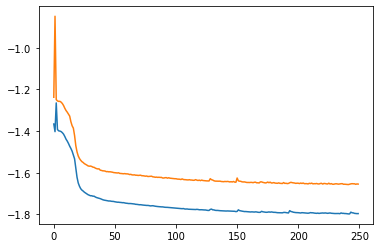

In [ ]:
plt.plot(np.log10(train_losses))
plt.plot(np.log10(val_losses))
plt.show()